# **Import Library**

In [53]:
import pandas as pd

# **Load Datasets**

In [54]:
df=pd.read_csv("/content/Datasets/sol_dataset.csv")
print(df)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]


# **Data Preparation**

## Data Separation as X (Independent Variable) and Y (Dependent Variable)

In [55]:
y = df["logS"]
print(y)

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64


In [56]:
x = df.drop("logS", axis=1)
print(x)

      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0     2.59540  167.850                0.0            0.000000
1     2.37650  133.405                0.0            0.000000
2     2.59380  167.850                1.0            0.000000
3     2.02890  133.405                1.0            0.000000
4     2.91890  187.375                1.0            0.000000
...       ...      ...                ...                 ...
1139  1.98820  287.343                8.0            0.000000
1140  3.42130  286.114                2.0            0.333333
1141  3.60960  308.333                4.0            0.695652
1142  2.56214  354.815                3.0            0.521739
1143  2.02164  179.219                1.0            0.461538

[1144 rows x 4 columns]


## Data Spliting

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)
print("X-TRAIN",x_train)
print("X-TEST",x_test)
print("Y-TRAIN",y_train)
print("Y-TEST",y_test)

X-TRAIN      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
107  3.14280  112.216                5.0            0.000000
378 -2.07850  142.070                0.0            0.000000
529 -0.47730  168.152                0.0            0.000000
546 -0.86740  154.125                0.0            0.000000
320  1.62150  100.161                2.0            0.000000
..       ...      ...                ...                 ...
802  3.00254  250.301                1.0            0.842105
53   2.13860   82.146                3.0            0.000000
350  5.76304  256.348                0.0            0.900000
79   3.89960  186.339               10.0            0.000000
792  2.52334  310.297                3.0            0.300000

[915 rows x 4 columns]
X-TEST       MolLogP    MolWt  NumRotatableBonds  AromaticProportion
822   2.91000  172.268                7.0            0.000000
118   7.27400  360.882                1.0            0.666667
347   1.94040  145.161                0.0  

# **Model Building**

## Liner Regression

### Train the Model with X_train and Y_train

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Apply this model to make a prediction

In [59]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
print(y_lr_train_pred)
print(y_lr_test_pred)


[-2.83668969  0.84208401 -0.50930302 -0.13058053 -1.6269208  -2.86103037
 -2.32208333 -4.16684323 -5.04235077 -2.29737009 -3.15082845 -4.33037208
 -1.43700682 -2.59060064 -7.09025955 -2.32734557 -4.19073421 -2.63904005
 -3.58104074 -3.75929058 -2.5501665  -3.26968347 -2.78911367 -2.69251051
 -0.77437547 -6.61955792 -2.99084623 -2.36975061 -7.18167736 -1.52816491
 -4.81736265 -0.86996608 -7.09025955 -1.87404275 -2.58013247 -4.80953284
 -4.17454084 -1.95444152 -3.50503339 -2.7411418  -1.87131835 -2.45270806
 -3.07252433 -1.48988982 -3.98778754 -1.35216679 -0.16932277 -6.05237002
 -3.29550658  0.30513174 -3.25501463 -5.31993586 -0.4733928  -4.79180882
 -5.82486323 -2.70343539 -3.70838271 -2.4987341  -2.12301018 -3.11393974
 -2.79842053 -1.38274662 -4.3267103  -3.57778946 -3.42356884 -9.15826626
 -6.52588866 -1.75832085 -4.97842312 -1.59255758 -1.91317252 -2.81075595
 -1.14056747 -1.6326702  -1.6269208  -5.33227425 -3.88805074  0.70432882
 -3.99288096 -2.22595859 -2.63405871 -1.80643013 -4

### Evaluate Model Performance

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2_score = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2_score = r2_score(y_test, y_lr_test_pred)

In [61]:
print("Y-TRAIN MSE: ",lr_train_mse)
print("Y-TEST MSE: ",lr_test_mse)
print("Y-TRAIN R2 score: ",lr_train_r2_score)
print("Y-TEST R2 score: ",lr_test_r2_score)





y_train MSE:  1.0075362951093687
y_test MSE:  1.0206953660861033
y_train R2 score:  0.7645051774663391
y_test R2 score:  0.7891616188563282


In [62]:
lr_result = pd.DataFrame(["Linear Regression",lr_train_mse, lr_train_r2_score, lr_test_mse, lr_test_r2_score  ]).transpose()
lr_result.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]
print(lr_result)

              Method Train MSE  Train R2  Test MSE   Test R2
0  Linear Regression  1.007536  0.764505  1.020695  0.789162


## Random Forest Model

### Train the Model with X_train and Y_train

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor( max_depth=None, random_state= 100)
rf.fit(x_train, y_train)


RandomForestRegressor(random_state=100)

### Apply this model to make a prediction

In [71]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
print(y_rf_train_pred)
print(y_rf_test_pred)

[-4.46571333e+00 -1.31388000e+00 -1.79472500e+00 -1.78479500e+00
 -7.50138333e-01 -2.96656500e+00 -3.75891667e+00 -4.31497000e+00
 -5.58883687e+00 -1.83962500e+00 -2.73006167e+00 -3.97048000e+00
 -1.88473000e+00 -2.48352833e+00 -7.52435500e+00 -2.00145000e+00
 -4.25196833e+00 -3.18116667e+00 -4.13430000e+00 -3.84737000e+00
 -2.23584933e+00 -3.21223262e+00 -1.57905833e+00 -3.48499000e+00
 -4.63400000e-01 -6.85681333e+00 -2.34753000e+00 -2.29146167e+00
 -7.17875000e+00 -1.19250000e-01 -4.42353500e+00 -3.77800000e-01
 -7.52435500e+00 -1.86093833e+00 -2.49146000e+00 -4.13223000e+00
 -4.03030900e+00 -2.33145000e+00 -3.43218000e+00 -3.09648000e+00
 -2.55487500e+00 -3.77846667e+00 -2.10039000e+00 -1.11943929e+00
 -3.58387000e+00  9.07100000e-01  2.77490000e-01 -4.64506000e+00
 -2.75681000e+00  1.36052000e+00 -3.48508000e+00 -6.21860000e+00
 -4.23200000e-02 -4.45995000e+00 -6.24037000e+00 -4.38820000e+00
 -4.50211654e+00 -2.20771000e+00 -2.48596443e+00 -3.88972333e+00
 -2.85379833e+00 -4.27751

### Evaluate Model Preformance

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2_score = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2_score = r2_score(y_test, y_rf_test_pred)

In [94]:
print("Y-TRAIN MSE: ",rf_train_mse)
print("Y-TEST MSE: ",rf_test_mse)
print("Y-TRAIN R2 score: ",rf_train_r2_score)
print("Y-TEST R2 score: ",rf_test_r2_score)

Y-TRAIN MSE:  0.08637199208993933
Y-TEST MSE:  0.6494751342018575
Y-TRAIN R2 score:  0.979811985882959
Y-TEST R2 score:  0.8658421597295297


In [95]:
rf_result = pd.DataFrame(["Random Forest Regressor",rf_train_mse, rf_train_r2_score, rf_test_mse, rf_test_r2_score  ]).transpose()
rf_result.columns = ["Method", "Train MSE", "Train R2", "Test MSE", "Test R2"]
print(rf_result)

                    Method Train MSE  Train R2  Test MSE   Test R2
0  Random Forest Regressor  0.086372  0.979812  0.649475  0.865842


## **Model Comparison between Linear Regression and Random Forest Regressor**

In [77]:
df_result = pd.concat([lr_result, rf_result], axis=0)
print(df_result)

                    Method Train MSE  Train R2  Test MSE   Test R2
0        Linear Regression  1.007536  0.764505  1.020695  0.789162
0  Random Forest Regressor  0.086372  0.979812  0.649475  0.865842


# **Data Visualization of prediction Results**

## Visualization of Linear Regression

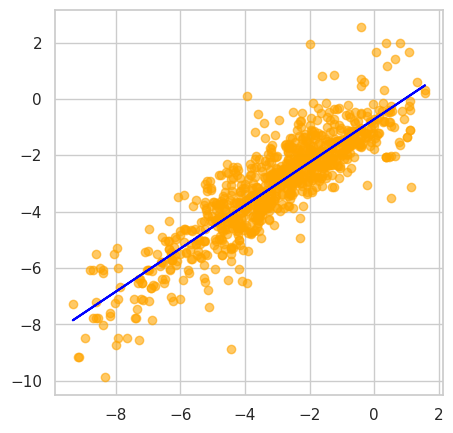

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_lr_train_pred, color="orange", alpha=0.6)
line = np.polyfit(y_train, y_lr_train_pred, 1)
plt.plot(y_train, np.poly1d(line)(y_train), color="blue")
plt.grid(True)
plt.show()


## Visualization of Random Forest Regressor

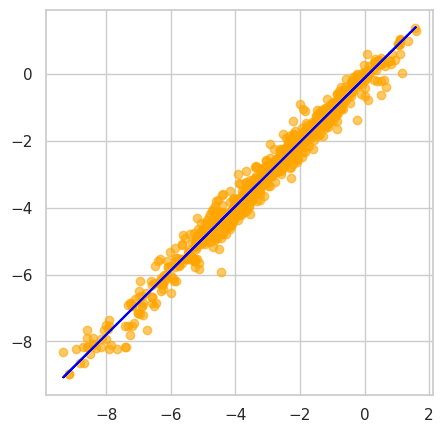

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_rf_train_pred, color="orange", alpha=0.6)
line = np.polyfit(y_train, y_rf_train_pred, 1)
plt.plot(y_train, np.poly1d(line)(y_train), color="blue")
plt.grid(True)
plt.show()
